https://stats.stackexchange.com/questions/114385/what-is-the-difference-between-convolutional-neural-networks-restricted-boltzma

In [1]:
import numpy as np
import re
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [2]:
#Concept of open an file in read mode
f = open('/home/chintan/Class_Code/Class14(Droput And Marcovs)/Resources/input.txt', 'r') #Ist paraeter is path of a file and second parameter is mode in which you are going to access the file
ds = f.read() #Now we read the file
f.close()#in every mode you have to close the file


In [3]:
#d = d.decode?

In [4]:
print ds[:1000]





                          THE COMPLETE SHERLOCK HOLMES

                               Arthur Conan Doyle



                                Table of contents

               A Study In Scarlet

               The Sign of the Four

                  The Adventures of Sherlock Holmes
               A Scandal in Bohemia
               The Red-Headed League
               A Case of Identity
               The Boscombe Valley Mystery
               The Five Orange Pips
               The Man with the Twisted Lip
               The Adventure of the Blue Carbuncle
               The Adventure of the Speckled Band
               The Adventure of the Engineer's Thumb
               The Adventure of the Noble Bachelor
               The Adventure of the Beryl Coronet
               The Adventure of the Copper Beeches

                  The Memoirs of Sherlock Holmes
               Silver Blaze
               The Yellow Face
               The Stock-Broker's Clerk
               The "Gloria 

### Data Cleaning Step 

In [5]:
#Data Cleaning
for ix in ds[:1000].split('\n'): #split the data on the basis of line break
    print [ix.strip()]            #ix.strip is used to clean the whitespaces through data

print '$$$'.join(['1', '2', '3'])

['']
['']
['']
['']
['THE COMPLETE SHERLOCK HOLMES']
['']
['Arthur Conan Doyle']
['']
['']
['']
['Table of contents']
['']
['A Study In Scarlet']
['']
['The Sign of the Four']
['']
['The Adventures of Sherlock Holmes']
['A Scandal in Bohemia']
['The Red-Headed League']
['A Case of Identity']
['The Boscombe Valley Mystery']
['The Five Orange Pips']
['The Man with the Twisted Lip']
['The Adventure of the Blue Carbuncle']
['The Adventure of the Speckled Band']
["The Adventure of the Engineer's Thumb"]
['The Adventure of the Noble Bachelor']
['The Adventure of the Beryl Coronet']
['The Adventure of the Copper Beeches']
['']
['The Memoirs of Sherlock Holmes']
['Silver Blaze']
['The Yellow Face']
["The Stock-Broker's Clerk"]
['The "Gloria']
1$$$2$$$3


In [6]:
print ds.index('A STUDY IN SCARLET')
start = 2525
length = 50000

data = ' '.join([ix.strip() for ix in ds[start:start+length].split('\n')]).lower()
#print data

2525


### This code is for second file Trump one

In [7]:
#import pandas as pd
#df = pd.read_csv('../../trump_tw.csv')['text']
#data = '. '.join([str(ix) for ix in df]).lower()

#### Now continue to Original code

In [8]:
# print data
print len(data)#Now this length is useful (45869) without any whitespace and extraunuseful characters
print '-'*100

print set(data)  #This will find all the unique states in our dataset(in order to run marcov on this) and to find unique characters as well
print '-'*100

print len(set(data)) #length of set of data(unique characters or dtate in our dtaset)

45869
----------------------------------------------------------------------------------------------------
set(['!', ' ', '"', "'", ')', '(', '-', ',', '.', '1', '0', '3', '2', '5', '4', '7', '6', '9', '8', ';', ':', '?', 'a', 'c', 'b', 'e', 'd', 'g', 'f', 'i', 'h', 'k', 'j', 'm', 'l', 'o', 'n', 'q', 'p', 's', 'r', 'u', 't', 'w', 'v', 'y', 'x', 'z'])
----------------------------------------------------------------------------------------------------
48


#In order to understand 


Run this first

dict1={ 'a':1,'b':2}

print dict1

print dict1['a']

dict1['a']={}

print dict1


T={}
ctx= 'a'
future_val= ''

if T.get(ctx) is None:
    T[ctx]={}
    T[ctx][future_val]=1
print T

OUTPUT : {'a': {'': 1}}



In [9]:
#Use dictionary to implememnt Now we are going to form a transition Probability Matrix

T = {}
#T.get?
# define order of the Markov chain
order = 1                 #By default the order is 1 for marcov chain and this orer mean we are going to see past order days or data

for ix in range(len(data)-order):
    # get the current context
    ctx = data[ix:ix+order]
    #print ctx  #All current character 
    # get the future val
    future_val = data[ix+order] #After current character future value 
    
    # check if the context exists
    if T.get(ctx) is None: 
        T[ctx] = {}
        T[ctx][future_val] = 1  #Output for ist valye of ctx is {'a': {'': 1}}
    else:
        
        # check if the future_val key exists
        if T[ctx].get(future_val) is None:
            T[ctx][future_val] = 1
        else:
            T[ctx][future_val] += 1

In [18]:
#print T  # This is for now is a dictionary in which all decribe the no. of occurences for each key
print len(T.keys())  #length of keys present in dict not redundant (48)
#print T.keys()
#print sum(T['!'].values()) the sum is 1
#print sum(T['2'].values()) #1
#print '-'*100
#print T['!'].keys()
#print T['!'][' '] # Value at this keys
print T['!'].values()
print T['!'].keys()
print T['!'][' ']

48
[5, 17]
[' ', '"']
5


In [11]:
for kx in T.keys(): #This loop represents the iteration over all the keys in dictionary means loop run 48 times
    
    s = float(sum(T[kx].values())) # the value of s is [5, 17]
    
    for k in T[kx].keys(): #This is for nested keys values in nested dictionary
        T[kx][k] = T[kx][k]/s                 #For ex for ist value print T['!'][' '] result =5 now 5/s= 5/sum of all(5+17) gives the probability
#print T['h']  #It basically to visualize that after H what is the probability of future_var comes to be there so probability of e is max

 this function is used for smoothening function which means 
    #We say green color graph is original graph means after T the probabilites oh is max 0.28 that mean after T almost in all cases h arrives 
    #But there may be a chance of another letter coming after that so we apply this function describing temperature value which takes this graph as red in color means now the probability of letter that high in probability is somewhat decreased and the letter whose chances are less whose prob are increased by somehow So we balancing the probabilites by the formula 
     

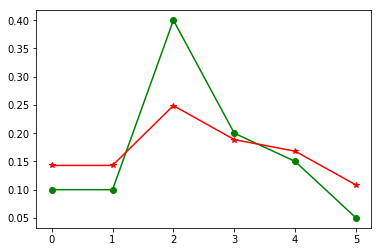

In [31]:
#This block is used to draw a graph that show the compatibile probabilites of all keys

def temp_sample(probs, temp=1.0): #temp is oout temperature value that control diversity value
    probs = np.asarray(probs)
    exp_probs = np.exp(np.log(probs) / temp)      #probability formula = exp(zi) and zi is log(pi) see from copy
    return list(exp_probs / exp_probs.sum()) #Now this is the list or prob whose chances of occurences for all keys approax to be compatible   


#This is example 

p = [0.1, 0.1, 0.4, 0.2, 0.15, 0.05]  #lEt take a set of probabilities 
q = temp_sample(p, 2.5)  # And now plot a q by passing it to a smoothenung function by giving temperature value =2.5 more the temperature value more will be the diversity

plt.plot(p, 'go-')
plt.plot(q, 'r*-')

plt.show()

In [40]:
def generate_next(ctx, diversity=1.0):
    r = np.random.random()
    
    possible = T.get(ctx)
    print possible
    print 'here'
    if possible is None:
        return ' '
    diverse_probs = temp_sample(possible.values(), temp=diversity)
    return np.random.choice(possible.keys(), p=diverse_probs)

In [41]:
#print T['t']
#print generate_next("t", diversity=1.0)

In [42]:
ind = int(np.random.random()*(len(data)-order))
initial_state = 'mexic'              #data[ind:ind+order]
ctx = initial_state

sentence = '' + ctx

for ix in range(2000):
    nxt = generate_next(ctx, diversity=0.8)
    sentence += nxt
    ctx = sentence[-order:]

print sentence

None
here
{' ': 209, '"': 198, "'": 5, '(': 1, '1': 5, '3': 3, '2': 2, '5': 1, '4': 2, '7': 1, '6': 1, '9': 1, '8': 1, 'a': 1022, 'c': 309, 'b': 318, 'e': 174, 'd': 230, 'g': 117, 'f': 259, 'i': 675, 'h': 669, 'k': 51, 'j': 25, 'm': 444, 'l': 217, 'o': 486, 'n': 157, 'q': 20, 'p': 211, 's': 554, 'r': 170, 'u': 108, 't': 1077, 'w': 546, 'v': 47, 'y': 115, 'z': 1}
here
{'!': 1, ' ': 563, "'": 19, '-': 5, ',': 48, '.': 47, ';': 2, '?': 3, 'a': 65, 'c': 105, 'e': 174, 'd': 421, 'g': 307, 'f': 12, 'i': 105, 'k': 19, 'j': 2, 'm': 3, 'l': 19, 'o': 187, 'n': 11, 'q': 5, 'p': 2, 's': 86, 'r': 5, 'u': 10, 't': 200, 'w': 1, 'v': 12, 'y': 34, 'x': 2}
here
{' ': 209, '"': 198, "'": 5, '(': 1, '1': 5, '3': 3, '2': 2, '5': 1, '4': 2, '7': 1, '6': 1, '9': 1, '8': 1, 'a': 1022, 'c': 309, 'b': 318, 'e': 174, 'd': 230, 'g': 117, 'f': 259, 'i': 675, 'h': 669, 'k': 51, 'j': 25, 'm': 444, 'l': 217, 'o': 486, 'n': 157, 'q': 20, 'p': 211, 's': 554, 'r': 170, 'u': 108, 't': 1077, 'w': 546, 'v': 47, 'y': 115, '

{' ': 209, '"': 198, "'": 5, '(': 1, '1': 5, '3': 3, '2': 2, '5': 1, '4': 2, '7': 1, '6': 1, '9': 1, '8': 1, 'a': 1022, 'c': 309, 'b': 318, 'e': 174, 'd': 230, 'g': 117, 'f': 259, 'i': 675, 'h': 669, 'k': 51, 'j': 25, 'm': 444, 'l': 217, 'o': 486, 'n': 157, 'q': 20, 'p': 211, 's': 554, 'r': 170, 'u': 108, 't': 1077, 'w': 546, 'v': 47, 'y': 115, 'z': 1}
here
{' ': 244, "'": 7, ',': 1, '.': 2, 'a': 31, 'c': 181, 'b': 11, 'e': 72, 'd': 105, 'g': 56, 'f': 57, 'i': 4, 'k': 10, 'm': 118, 'l': 81, 'o': 144, 'n': 670, 'q': 1, 'p': 16, 's': 341, 'r': 79, 'u': 3, 't': 305, 'w': 1, 'v': 52, 'x': 9, 'z': 12}
here
{' ': 209, '"': 198, "'": 5, '(': 1, '1': 5, '3': 3, '2': 2, '5': 1, '4': 2, '7': 1, '6': 1, '9': 1, '8': 1, 'a': 1022, 'c': 309, 'b': 318, 'e': 174, 'd': 230, 'g': 117, 'f': 259, 'i': 675, 'h': 669, 'k': 51, 'j': 25, 'm': 444, 'l': 217, 'o': 486, 'n': 157, 'q': 20, 'p': 211, 's': 554, 'r': 170, 'u': 108, 't': 1077, 'w': 546, 'v': 47, 'y': 115, 'z': 1}
here
{' ': 209, '"': 198, "'": 5, '(

{'a': 124, ' ': 15, 'c': 27, 'e': 151, 'i': 44, 'h': 162, 'k': 56, 'l': 45, 'o': 189, ',': 4, 'q': 4, 's': 4, 'r': 42, 'u': 32, 't': 69, 'y': 4, '.': 3}
here
{'!': 3, ' ': 674, '"': 1, "'": 7, '-': 9, ',': 52, '.': 57, ';': 2, '?': 10, 'a': 140, 'c': 10, 'e': 262, 'i': 210, 'h': 917, 'm': 5, 'l': 58, 'o': 326, 'n': 4, 'p': 1, 's': 52, 'r': 85, 'u': 64, 't': 74, 'w': 18, 'y': 33}
here
{' ': 209, '"': 198, "'": 5, '(': 1, '1': 5, '3': 3, '2': 2, '5': 1, '4': 2, '7': 1, '6': 1, '9': 1, '8': 1, 'a': 1022, 'c': 309, 'b': 318, 'e': 174, 'd': 230, 'g': 117, 'f': 259, 'i': 675, 'h': 669, 'k': 51, 'j': 25, 'm': 444, 'l': 217, 'o': 486, 'n': 157, 'q': 20, 'p': 211, 's': 554, 'r': 170, 'u': 108, 't': 1077, 'w': 546, 'v': 47, 'y': 115, 'z': 1}
here
{' ': 209, '"': 198, "'": 5, '(': 1, '1': 5, '3': 3, '2': 2, '5': 1, '4': 2, '7': 1, '6': 1, '9': 1, '8': 1, 'a': 1022, 'c': 309, 'b': 318, 'e': 174, 'd': 230, 'g': 117, 'f': 259, 'i': 675, 'h': 669, 'k': 51, 'j': 25, 'm': 444, 'l': 217, 'o': 486, 'n': 

{'!': 1, ' ': 835, "'": 1, '-': 8, ',': 86, '.': 55, ';': 5, '?': 2, 'a': 24, 'e': 207, 'd': 13, 'g': 19, 'f': 1, 'i': 98, 'k': 1, 'm': 2, 'l': 18, 'o': 88, 'n': 4, 's': 30, 'r': 25, 'u': 35, 'w': 1, 'v': 4, 'y': 17}
here
{' ': 209, '"': 198, "'": 5, '(': 1, '1': 5, '3': 3, '2': 2, '5': 1, '4': 2, '7': 1, '6': 1, '9': 1, '8': 1, 'a': 1022, 'c': 309, 'b': 318, 'e': 174, 'd': 230, 'g': 117, 'f': 259, 'i': 675, 'h': 669, 'k': 51, 'j': 25, 'm': 444, 'l': 217, 'o': 486, 'n': 157, 'q': 20, 'p': 211, 's': 554, 'r': 170, 'u': 108, 't': 1077, 'w': 546, 'v': 47, 'y': 115, 'z': 1}
here
{'!': 3, ' ': 674, '"': 1, "'": 7, '-': 9, ',': 52, '.': 57, ';': 2, '?': 10, 'a': 140, 'c': 10, 'e': 262, 'i': 210, 'h': 917, 'm': 5, 'l': 58, 'o': 326, 'n': 4, 'p': 1, 's': 52, 'r': 85, 'u': 64, 't': 74, 'w': 18, 'y': 33}
here
{'a': 425, ' ': 220, 'e': 837, '!': 1, 'f': 1, 'i': 349, 'm': 4, ',': 9, 'o': 204, 'n': 5, 's': 4, 'r': 21, 'u': 15, 't': 63, 'w': 2, 'y': 10, '.': 13, 'l': 1}
here
{'!': 1, ' ': 563, "'": 

# Experiment to learn the markov code

In [39]:
dict1={ 'a':1,'b':2}
print dict1
print dict1['a']
dict1['a']={}
print dict1
print dict1['a']

{'a': 1, 'b': 2}
1
{'a': {}, 'b': 2}
{}


In [40]:
people = {1: {'name': 'John', 'age': '27', 'sex': 'Male'},
          2: {'name': 'Marie', 'age': '22', 'sex': 'Female'}}

print(people)
print people[1]['name']
print people[2]['sex']
people1={}
people1[3] = {}

people1[3]['name'] = 'Luna'
people1[3]['age'] = '24'
people1[3]['sex'] = 'Female'
#people[3]['married'] = 'No'

#print(people[3])


{1: {'age': '27', 'name': 'John', 'sex': 'Male'}, 2: {'age': '22', 'name': 'Marie', 'sex': 'Female'}}
John
Female


In [41]:
print people1,'\n'

{3: {'age': '24', 'name': 'Luna', 'sex': 'Female'}} 



In [42]:
T={'a':{}}
ctx= 'b'
future_val= ''

if T.get(ctx) is None:
    T[ctx]={}
    T[ctx][future_val]=1
#print T
else :
    
    if T[ctx].get(future_val) is None:
        T[ctx][future_val] = 1
    else:
         T[ctx][future_val] += 1

In [43]:
print T

{'a': {}, 'b': {'': 1}}
